<h1>Testando modelos com as 10 melhores colunas</h1>

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.linear_model import LogisticRegression # algoritmo Regressão Logística
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('datasets/DADOS_ED_PROCESSADOS.csv', encoding="latin-1", sep = ';')

In [4]:
df_ed = df.iloc[:,:-1]
alvo = df.iloc[:,-1].values

print(alvo)

#NORMALIZAR O CONJUNTO SEPARADO

scaler = MinMaxScaler()
col_names = df_ed.columns

# Transformar os atributos
df_ed = pd.DataFrame(scaler.fit_transform(df_ed))
df_ed.columns = col_names

df_ed

[0 0 0 ... 0 0 0]


,TX_APR,TX_REP,TX_ABD,TNR,TDI,IRD,IED_NIVEL1,IED_NIVEL2,IED_NIVEL3,IED_NIVEL4,...,QT_DOC_ESP_CE,QT_TUR_INF,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,1.000000,0.000000,0.000000,0.021142,0.044150,0.450,0.334,0.333,0.000,0.000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.307692,0.307692,0.000000
1,0.556617,0.490196,0.000000,0.073996,0.049669,0.550,0.500,0.000,0.000,0.500,...,0.000000,0.025641,0.0,0.0,0.000000,0.000000,0.000000,0.046154,0.046154,0.000000
2,0.957708,0.046757,0.000000,0.015856,0.049669,0.600,0.500,0.000,0.000,0.500,...,0.000000,0.025641,0.0,0.0,0.000000,0.000000,0.000000,0.061538,0.061538,0.000000
3,0.712142,0.318250,0.000000,0.183932,0.662252,0.500,0.500,0.000,0.000,0.500,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.107692,0.107692,0.000000
4,1.000000,0.000000,0.000000,0.008457,0.041943,0.775,0.500,0.333,0.000,0.167,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.338462,0.338462,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32209,0.984993,0.016591,0.000000,0.064482,0.324503,0.225,0.000,0.174,0.696,0.130,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000
32210,0.901774,0.072398,0.053097,0.022199,0.248344,0.425,0.000,0.297,0.407,0.259,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.323077,0.323077,0.000000
32211,0.800819,0.220211,0.000000,0.048626,0.303532,0.425,0.046,0.182,0.636,0.045,...,0.076923,0.000000,0.0,0.0,0.044944,0.044944,0.000000,0.184615,0.169231,0.052632
32212,0.927694,0.079940,0.000000,0.047569,0.357616,0.350,0.000,0.022,0.766,0.085,...,0.000000,0.000000,0.0,0.0,0.179775,0.112360,0.428571,0.507692,0.507692,0.000000


In [5]:
df_classif = df.loc[:,["QT_DESKTOP_ALUNO", "TX_REP", "IN_ESGOTO_REDE_PUBLICA", "AFD_GRP1", "QT_EQUIP_SOM", "IN_INTERNET_APRENDIZAGEM", "TX_ABD", "IN_ORGAO_ASS_PAIS_MESTRES",
                       "TX_APR", "TDI"]]

df_classif_train, df_classif_test, alvo_train, alvo_test =  train_test_split(df_classif, alvo, test_size=0.20, random_state=7)


df_chi2 = df.loc[:,["IN_ESGOTO_REDE_PUBLICA", "TDI", "IN_EJA_FUND", "IN_ESGOTO_FOSSA", "IN_EJA", "IN_LIXO_DESTINO_FINAL_PUBLICO", "IN_PARQUE_INFANTIL", "TP_LOCALIZACAO", "IN_LIXO_QUEIMA",
                    "IN_ORGAO_ASS_PAIS_MESTRES"]]


df_chi2_train, df_chi2_test, alvo_train, alvo_test =  train_test_split(df_chi2, alvo, test_size=0.20, random_state=7)


df_mutual = df.loc[:,["QT_EQUIP_SOM", "IN_TRATAMENTO_LIXO_INEXISTENTE", "TX_REP", "IN_ESGOTO_REDE_PUBLICA", "AFD_GRP1", "IN_INTERNET_APRENDIZAGEM", "IN_ORGAO_ASS_PAIS_MESTRES",
                      "TX_ABD", "TX_APR", "TDI"]]


df_mutual_train, df_mutual_test, alvo_train, alvo_test =  train_test_split(df_mutual, alvo, test_size=0.20, random_state=7)


df_rf = df.loc[:,['TX_APR', 'TNR', 'TDI', 'IED_NIVEL4', 'ATU', 'AFD_GRP1', 'AFD_GRP3', 'QT_DESKTOP_ALUNO', 'QT_MAT_FUND', 'QT_DOC_ESP']]
df_rf_train, df_rf_test, alvo_train, alvo_test =  train_test_split(df_rf, alvo, test_size=0.20, random_state=7)


df_et = df.loc[:,["IN_QUADRA_ESPORTES_COBERTA","IN_ESGOTO_REDE_PUBLICA",
                  "AFD_GRP1","IN_PARQUE_INFANTIL","TX_REP","IN_INTERNET_APRENDIZAGEM","TX_ABD","TX_APR","IN_ORGAO_ASS_PAIS_MESTRES","TDI"]]
df_et_train, df_et_test, alvo_train, alvo_test =  train_test_split(df_et, alvo, test_size=0.20, random_state=7)



In [6]:
scoring = 'accuracy'

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
np.random.seed(7) 

LR: 0.742191 (0.006122)
KNN: 0.699158 (0.008686)
CART: 0.653487 (0.007879)
NB: 0.691048 (0.008457)
SVM: 0.730589 (0.005224)


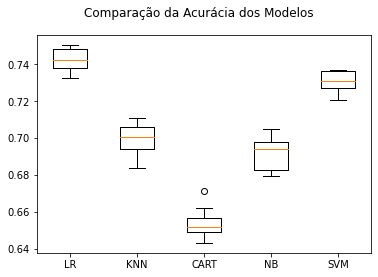

In [7]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_classif_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.728920 (0.005082)
KNN: 0.693260 (0.010817)
CART: 0.682821 (0.009133)
NB: 0.696208 (0.011179)
SVM: 0.725079 (0.002552)


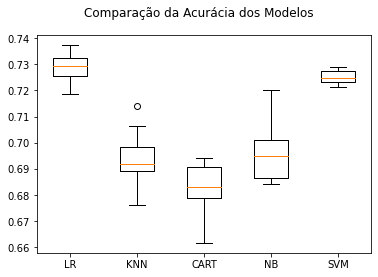

In [8]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_chi2_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.743510 (0.006804)
KNN: 0.704746 (0.007488)
CART: 0.651663 (0.006746)
NB: 0.687478 (0.011114)
SVM: 0.730472 (0.004126)


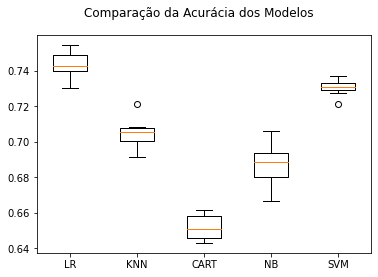

In [9]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_mutual_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.725001 (0.004646)
KNN: 0.660549 (0.008506)
CART: 0.651741 (0.008220)
NB: 0.684529 (0.007819)
SVM: 0.717822 (0.004064)


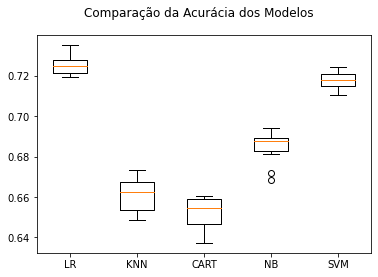

In [10]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_rf_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

LR: 0.745955 (0.007914)
KNN: 0.703310 (0.008013)
CART: 0.653370 (0.004477)
NB: 0.690737 (0.008115)
SVM: 0.725893 (0.005030)


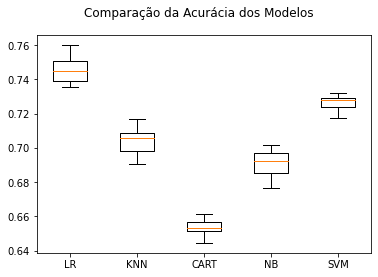

In [11]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
  cv_results = cross_val_score(model, df_et_train, alvo_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()